# Student's t-Distribution

In 1908 W.S. Gosset, who worked for the Guinness brewery in Dublin, was interested in the problems of small samples, for example the chemical properties of barley where sample sizes might be as low as 3. Since in these measurements the true variance of the mean was unknown, it must be approximated by the sample standard error of the mean. And the ratio between the sample mean and the standard error had a distribution that was unknown till Gosset, under the pseudonym “Student,” solved that problem. The corresponding distribution is the t-distribution , and converges for larger values towards the normal distribution. Due to Gosset’s pseudonym, “Student,” it is now also known as Student’s distribution.

The t value for a sample of data is close related to the z value.  However, since the value of $\sigma$ (the population standard deviation) is unknown, we must replace it with an ESTIMATE of $\sigma$.  Our best estimate of
$\sigma$ is the sample standard deviation, $s$.

In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

# Generate some data ... 3000 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 10.
npts = 15
mu = 100.0
sigma = 10.0
x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)

# calculate the sample mean, and the sample standard deviation (unbiased).
xbar = np.mean(x)
s = np.std(x,ddof=1)

In [2]:
# calculate the standard error in the mean (SEM)
sem = s/np.sqrt(npts)
sem2 = stats.sem(x)

tscore = (xbar-mu)/sem

print ("Sample mean = ",xbar,"  Expected Mean = ",mu,"  SEM = ",sem,sem2)
print ("T score = ",tscore)

Sample mean =  99.2535672405032   Expected Mean =  100.0   SEM =  2.187669546502758 2.187669546502758
T score =  -0.3411999589654924


Our analysis follows almost exactly the same path as for the $z$ distribution, except we now use the t-distribution instead.  However, there is an additional step, and that is that we must consider the number of degrees of freedom.  For the comparison of a single sample mean to an expected population mean, the number of degrees of freedom is:

$N_{dof} = N - 1$

The t-distribution depends on the number of degrees of freedom.  For large N, the t-distibution approaches the z-distribution. But, for small N, the t-distribution is significantly wider than the z-distribution.

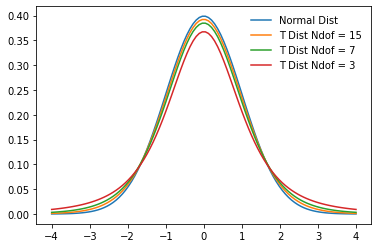

In [3]:
x = np.linspace(-4.0,4.0,100)
zdist = stats.norm.pdf(x)
tdist_1 = stats.t.pdf(x,15)
tdist_2 = stats.t.pdf(x,7)
tdist_3 = stats.t.pdf(x,3)

plt.plot(x,zdist,label='Normal Dist')
plt.plot(x,tdist_1,label="T Dist Ndof = 15")
plt.plot(x,tdist_2,label="T Dist Ndof = 7")
plt.plot(x,tdist_3,label="T Dist Ndof = 3")
plt.legend(loc='best', frameon=False)

In [4]:
# Calculate the upper and lower critical t values, based on our choice of alpha

alpha = 0.10
ndof = npts - 1

tLower = stats.t.ppf(alpha/2.0,ndof)

tUpper = stats.t.ppf(1-alpha/2.0,ndof)

print ("Lower and Upper Critical T Values: ",tLower,tUpper)

# calculate the critical upper and lower xbar values, based on these t values

xbarUpper = mu + tUpper*sem
xbarLower = mu + tLower*sem

print ("Lower and Upper Critical Xbar Values: ",xbarLower, xbarUpper)

Lower and Upper Critical T Values:  -1.7613101357748564 1.7613101357748562
Lower and Upper Critical Xbar Values:  96.14683545401871 103.85316454598129


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.140e+02, 1.266e+03, 1.043e+03, 9.480e+02, 8.070e+02,
        7.190e+02, 5.600e+02, 4.850e+02, 3.950e+02, 3.140e+02, 2.850e+02,
        2.560e+02, 1.740e+02, 1.360e+0

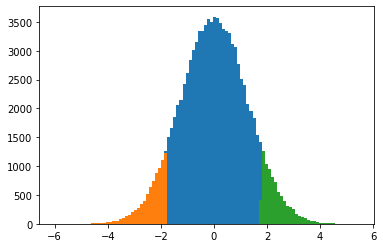

In [5]:
# We will take a sample of 15 points from a Gaussian distribution with mu=100.0 and sigma=10.0, 
# and each time we do this, we will calculate xbar.  Then, we will calculate the t value corresponding 
# to that value of xbar.   Finally, we will create a histogram of these t-values.

xbararray = []
nbins = 100

# perform the experiment 100000 times
for i in range(100000):
    x = stats.t.rvs(df=npts-1,size=npts,loc=mu,scale=sigma)
    xbararray.append(np.mean(x))
    
xbararray = np.array(xbararray)
tscorearray = (xbararray-mu)/sem
        
tlow = tscorearray[(tscorearray<tLower)]
thigh = tscorearray[(tscorearray>tUpper)]

bins=np.histogram(np.hstack((tscorearray,tlow,thigh)), bins=nbins)[1] #get the bin edges

plt.hist(tscorearray,bins)
plt.hist(tlow,bins)
plt.hist(thigh,bins)

So, you might be thinking ... is this really that big a deal?  I mean, the difference between the t-distribution and the z-distribution is only noticeable for VERY small sample sizes.  

The great power and usefulness of the t-distribution manifests itself when we have OUTLIERS in the data ... that is, data points that (because of just bad luck) lie far from the expected mean value.

In [69]:
# Let's begin by creating (artificially) a data set that has some outliers in it.
mu=0
sigma=10

npts = 10000
x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)
nptso = 2000
xoutliers = stats.norm.rvs(size=nptso,loc=mu+5*sigma,scale=sigma)

npts=npts+nptso

xmix = np.concatenate([x,xoutliers])

(8.295018025101665, 21.168248080174227)
(1.6867761963039603, 1.347063513817957, 10.120852866472099)


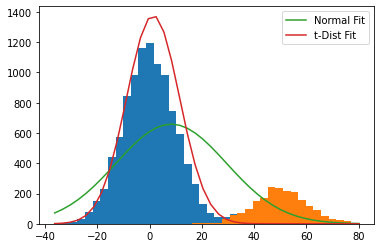

In [74]:
# Next, we fit the distribution with both a Gaussian fit and a t-Distribution fit

nbins = 40

bins=np.histogram(np.hstack((xmix,xoutliers)), bins=nbins)[1] #get the bin edges

start = bins[0]
width = bins[len(bins)-1]-bins[0]

xaxis = np.linspace(start,start+width,nbins)

#  Here is where we do the fitting
data_normal_fit = stats.norm.fit(xmix)
data_t_fit = stats.t.fit(xmix)

# Notes:  for the gaussian fit, there are two parameters determined - mu and sigma
#         for the t-distribution fit, there are THREE parameters determined - 
print(data_normal_fit)
print(data_t_fit)

data_normal_fitted = npts/nbins*width*stats.norm.pdf(xaxis,loc=data_normal_fit[0],scale=data_normal_fit[1])
data_t_fitted_1 = npts/nbins*width*stats.t.pdf(xaxis,df=data_t_fit[0],loc=data_t_fit[1],scale=data_t_fit[2])
data_t_fitted_2 = npts/nbins*width*stats.t.pdf(xaxis,df=npts-1,loc=data_t_fit[1],scale=data_t_fit[2])

plt.hist(xmix,bins)
plt.hist(xoutliers,bins)
plt.plot(xaxis,data_normal_fitted,label="Normal Fit")
#plt.plot(xaxis,data_t_fitted_1)
plt.plot(xaxis,data_t_fitted_2,label="t-Dist Fit")
plt.legend()

In [86]:
# Now, let's create (artificially) a data set that has some amount of background under the main peak.
mu=0
sigma=10

npts = 10000
x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)
nptsbg = 2000
xbg = stats.uniform.rvs(size=nptsbg,loc=mu-5.0*sigma,scale=10*sigma)

npts=npts+nptso

xmix = np.concatenate([x,xbg])

(0.2311212632357813, 14.989587813564377)
(3.6627651207072156, 0.10680847997467308, 10.730253544011209)


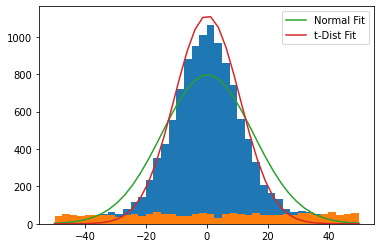

In [87]:
# Next, we fit the distribution with both a Gaussian fit and a t-Distribution fit

nbins = 40

bins=np.histogram(np.hstack((xmix,xbg)), bins=nbins)[1] #get the bin edges

start = bins[0]
width = bins[len(bins)-1]-bins[0]

xaxis = np.linspace(start,start+width,nbins)

#  Here is where we do the fitting
data_normal_fit = stats.norm.fit(xmix)
data_t_fit = stats.t.fit(xmix)

# Notes:  for the gaussian fit, there are two parameters determined - mu and sigma
#         for the t-distribution fit, there are THREE parameters determined - 
print(data_normal_fit)
print(data_t_fit)

data_normal_fitted = npts/nbins*width*stats.norm.pdf(xaxis,loc=data_normal_fit[0],scale=data_normal_fit[1])
data_t_fitted_1 = npts/nbins*width*stats.t.pdf(xaxis,df=data_t_fit[0],loc=data_t_fit[1],scale=data_t_fit[2])
data_t_fitted_2 = npts/nbins*width*stats.t.pdf(xaxis,df=npts-1,loc=data_t_fit[1],scale=data_t_fit[2])

plt.hist(xmix,bins)
plt.hist(xbg,bins)
plt.plot(xaxis,data_normal_fitted,label="Normal Fit")
#plt.plot(xaxis,data_t_fitted_1)
plt.plot(xaxis,data_t_fitted_2,label="t-Dist Fit")
plt.legend()